## Business Understanding

<pre>
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery.  
ㄴ 너의 데이터 분석 기술로 우주의 수수께끼를 풀어보아

We've received a transmission from four lightyears away and things aren't looking good.  
ㄴ 4광년 떨어진 상태가 안좋아 보이는 곳으로부터 송신을 받았다  

The Spaceship Titanic was an interstellar passenger liner launched a month ago.  
ㄴ 타이타닉 우주선은 1달전에 떠난 행성 여객기이다  

With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.<br>
ㄴ 13,000승객들이 승선했고, 선박은 우리 태양계 외 근처 새로운 행성에 거주할 곳으로 이주민들 운송하는 첫 시도이다.<br>
(vessel:선박-대형, emigrant:이주人, exoplanet:태양계 외 행성, orbit:궤도-영향권)<br>

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. <br>
ㄴ alpha centauri주변을 지나는 도중 첫 도착지에 55열대 cancri에서 먼지에 부딪혀 검게 됐다<br>
(torrid:열대, unwary:방심)<br>

Sadly, it met a similar fate as its namesake from 1000 years before.<br>
ㄴ1000년 전 비슷한 일이 있었다<br>


Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!<br>
ㄴ 멀쩡한 우주선은 승객 절반을 번갈아 이송했다   <br>
(intact:온전한, alternate:번갈아)<br>


To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.<br>
ㄴ 구조원과 미아 승객들을 도와줘, 우주선이 갖고 있는 데이터로 transport 된 승객들을 예측<br>


Help save them and change history!

Acknowledgments 
Photos by Joel Filipe, Richard Gatley and ActionVance on Unsplash.</pre>

## Data Understanding

<pre>
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
ㄴ 8700개 데이터
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
ㄴ id
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
ㄴ 승객들이 떠난 곳
(permanent:영구적인)
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. 
Passengers in cryosleep are confined to their cabins.
ㄴ 동면 선택여부
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
ㄴ P, S 객실
Destination - The planet the passenger will be debarking to.
ㄴ 도착지
Age - The age of the passenger.
ㄴ 나이
VIP - Whether the passenger has paid for special VIP service during the voyage.
ㄴ 여행중에 VIP서비스 받는지
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
ㄴ 해당 서비스 이용 금액
Name - The first and last names of the passenger.
ㄴ 이름
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
ㄴ 옮김 여부 
test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
ㄴ 4300개 데이터
sample_submission.csv - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.</pre>

## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import glob

import os

In [40]:
from sklearn.linear_model import LinearRegression


In [43]:
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.metrics import r2_score, classification_report

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'sample_submission.csv',
 'test.csv',
 'titanic_space.ipynb',
 'train.csv']

In [3]:
train = pd.read_csv('train.csv', encoding='utf-8')
train.shape

(8693, 14)

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data Preprocessing

#### check compare rate to target 
- 비율이 매우 좋음을 알 수 있음 

In [6]:
target = 'Transported'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


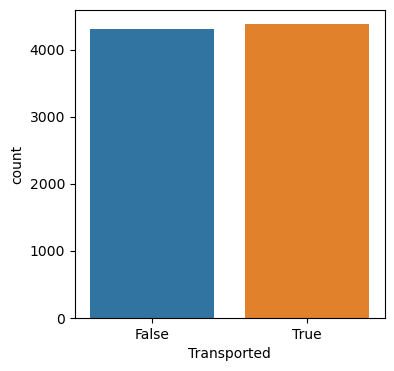

In [7]:
plt.figure(figsize=(4,4))
sns.countplot(train[target])
plt.show()

#### check drop columns

In [6]:
drop_columns1 = ['PassengerId', 'Name']  # 아이디, 이름 삭제

In [7]:
train.drop(columns=drop_columns1, axis=1, inplace=True)

In [10]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### NaN

In [8]:
train.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

- HomePlanet<br>
    지구가 많음
    NaN인 목록들의 공통점을 무엇일까

In [12]:
train['HomePlanet'].describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


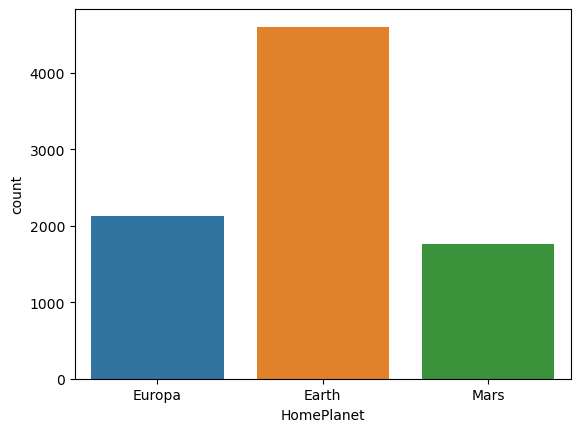

In [13]:
sns.countplot(train['HomePlanet'])
plt.show()

In [17]:
train.loc[train['HomePlanet'].isna()].head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
59,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,True
113,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,False
186,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,True
225,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,False
234,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,True
274,NaN,True,G/41/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,True
286,NaN,True,G/42/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,True
291,NaN,False,F/61/S,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,False
347,NaN,False,G/64/P,NaN,23.0,False,348.0,0.0,0.0,4.0,368.0,False
365,NaN,True,D/15/S,55 Cancri e,32.0,True,0.0,0.0,0.0,0.0,0.0,True


In [18]:
train.loc[train['HomePlanet'].isna()].tail(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
8353,NaN,True,F/1729/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,True
8383,NaN,False,F/1839/P,TRAPPIST-1e,21.0,False,0.0,6.0,0.0,593.0,0.0,False
8454,NaN,False,G/1465/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,298.0,511.0,False
8468,NaN,True,F/1848/P,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,True
8489,NaN,True,F/1758/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,True
8515,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,False
8613,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,False
8666,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,True
8674,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,False
8684,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,True


In [19]:
train.iloc[8350:8390]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
8350,Earth,False,F/1725/S,PSO J318.5-22,23.0,False,0.0,471.0,120.0,13.0,6.0,True
8351,Earth,False,F/1727/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,912.0,41.0,False
8352,Europa,True,E/574/P,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,True
8353,NaN,True,F/1729/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,True
8354,Mars,True,F/1729/S,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,True
8355,Earth,True,G/1441/S,PSO J318.5-22,24.0,False,0.0,0.0,0.0,0.0,0.0,True
8356,Earth,False,E/587/S,TRAPPIST-1e,24.0,False,771.0,0.0,22.0,0.0,0.0,False
8357,Mars,False,E/575/P,TRAPPIST-1e,26.0,True,1.0,445.0,170.0,614.0,68.0,False
8358,Mars,False,F/1834/P,TRAPPIST-1e,37.0,False,528.0,0.0,1598.0,62.0,0.0,True
8359,Mars,False,E/575/P,TRAPPIST-1e,14.0,False,1737.0,0.0,336.0,0.0,0.0,False


#### check Cabin column
- deck/num/side 컬럼으로 나눠줄 필요가 있어보임

In [17]:
train['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [30]:
train['Cabin'][0].split('/')[1]

'0'

In [31]:
train['Cabin'].isna().sum()

199

In [38]:
train['Cabin_deck'] = train.loc[train['Cabin'].notnull()]['Cabin'].apply(lambda data:str(data).split('/')[0])

In [39]:
train['Cabin_num'] = train.loc[train['Cabin'].notnull()]['Cabin'].apply(lambda data:str(data).split('/')[1])

In [40]:
train['Cabin_side'] = train.loc[train['Cabin'].notnull()]['Cabin'].apply(lambda data:str(data).split('/')[2])

In [41]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


#### check Describe

In [42]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


RoomService, FoodCourt, ShoppingMall, Spa, VRDeck의 사용 비용 빈부격차가 높음을 알 수 있음 나눠주자

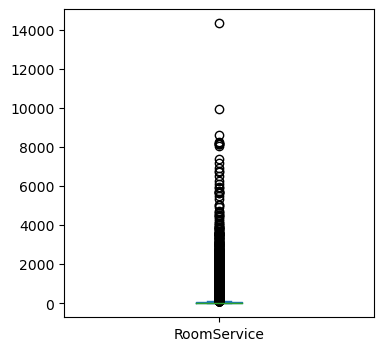

In [46]:
plt.figure(figsize=(4,4))
train['RoomService'].plot.box()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


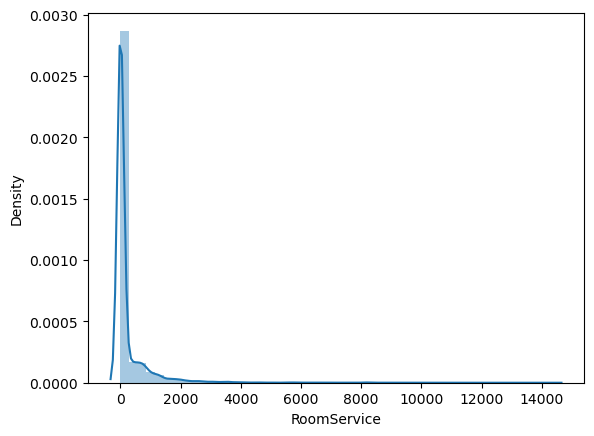

In [58]:
# 수치 시각화
sns.distplot(train.loc[train['RoomService'].notnull()]['RoomService'])
plt.show()

In [61]:
display(train.loc[train['RoomService'] >= 100], train.loc[train['VRDeck'] >= 100])

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
13,Earth,False,G/1/S,TRAPPIST-1e,48.0,False,719.0,1.0,65.0,0.0,24.0,False,G,1,S
16,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,False,F,3,P
20,Earth,False,F/6/P,55 Cancri e,14.0,False,412.0,0.0,1.0,0.0,679.0,False,F,6,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,Mars,False,E/595/P,TRAPPIST-1e,30.0,False,699.0,0.0,600.0,0.0,0.0,False,E,595,P
8662,Earth,False,F/1891/P,TRAPPIST-1e,62.0,False,102.0,696.0,0.0,0.0,0.0,True,F,1891,P
8675,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,True,F,1893,P
8682,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,True,G,1507,P


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
11,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,True,B,1,P
12,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,True,F,1,P
17,Earth,False,F/4/P,55 Cancri e,24.0,False,0.0,1.0,0.0,0.0,637.0,False,F,4,P
20,Earth,False,F/6/P,55 Cancri e,14.0,False,412.0,0.0,1.0,0.0,679.0,False,F,6,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,True,E,597,P
8669,Europa,False,B/301/P,55 Cancri e,26.0,False,0.0,8160.0,205.0,0.0,438.0,True,B,301,P
8683,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,False,F,1894,P
8687,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,True,A,97,P


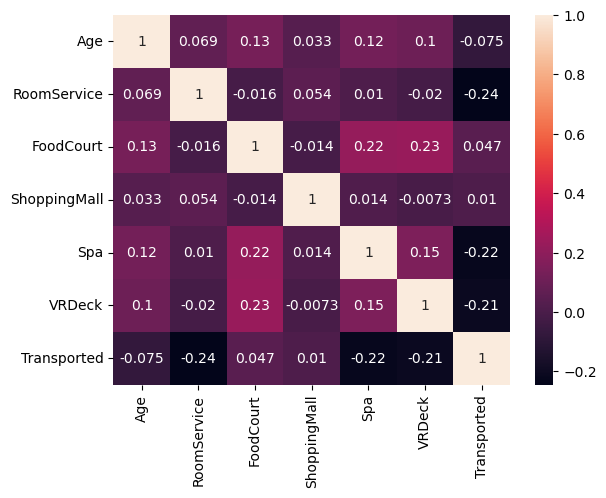

In [63]:
sns.heatmap(train.corr(), annot=True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13936\1852290056.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool) # corr을 다른 것으로 바꾸면 다른 상관계수 그래프를 그릴 수도 있음


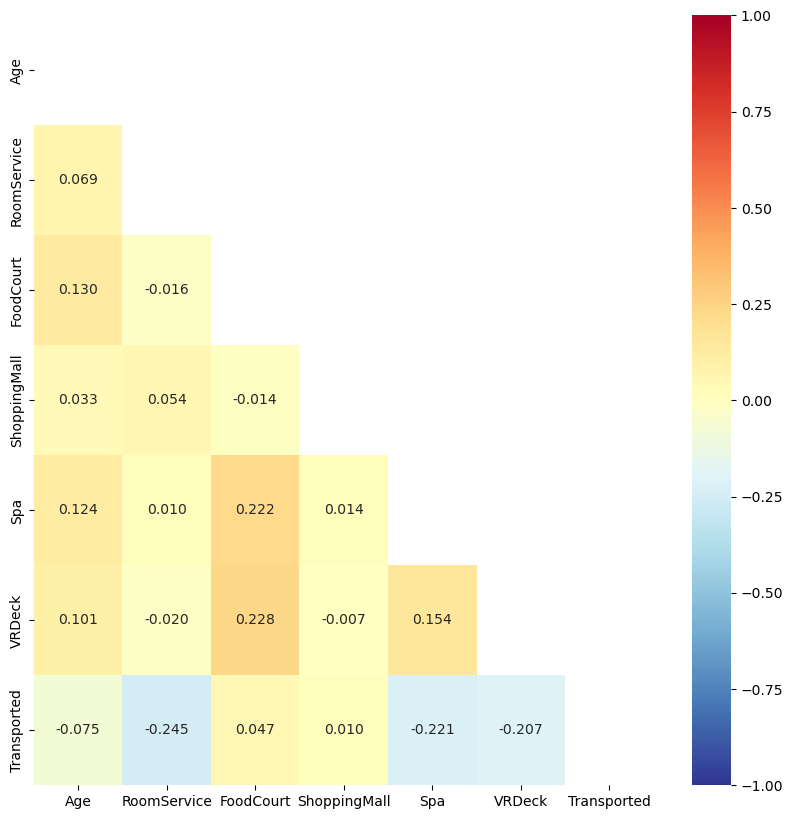

In [65]:
df = train.copy()

plt.figure(figsize = (10, 10))
mask = np.zeros_like(df.corr(), dtype=np.bool) # corr을 다른 것으로 바꾸면 다른 상관계수 그래프를 그릴 수도 있음
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot = True, fmt = '.3f', mask = mask, cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
plt.show()

- RoomService, shoppingMall은 격차가 너무 크기 때문에 1차적으로 없애자, (2차 작업시 재가공하도록)

In [10]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

#### drop : service

In [13]:
train.drop(labels=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)
train.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,True
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,True
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,True
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,True
9,Europa,True,B/1/P,55 Cancri e,14.0,False,True


- NaN reCheck

In [15]:
train.isna().sum()

HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
Age            179
VIP            203
Transported      0
dtype: int64

In [17]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [20]:
train['CryoSleep'] = train['CryoSleep'].replace({False:0, True:1})
train['CryoSleep'].value_counts()

0.0    5439
1.0    3037
Name: CryoSleep, dtype: int64

In [21]:
train['CryoSleep'].dtypes

dtype('float64')

In [ ]:
# alias int64
train['CryoSleep'] = train['CryoSleep'].astype('int64')
train['CryoSleep'].dtypes

- 'CryoSleep' check pattern

In [23]:
train.loc[train['CryoSleep'].isna()].head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
92,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,True
98,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,False
104,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,False
111,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,True
152,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,True


In [24]:
train.iloc[90:125]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
90,Earth,0.0,G/11/P,TRAPPIST-1e,26.0,False,True
91,Earth,0.0,F/19/P,PSO J318.5-22,23.0,False,False
92,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,True
93,Mars,1.0,NaN,TRAPPIST-1e,31.0,False,True
94,Earth,0.0,F/23/S,TRAPPIST-1e,18.0,False,False
95,Earth,0.0,F/24/S,TRAPPIST-1e,24.0,False,True
96,Earth,1.0,G/18/S,55 Cancri e,9.0,False,True
97,Earth,1.0,G/18/S,TRAPPIST-1e,6.0,False,False
98,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,False
99,Mars,0.0,D/2/S,TRAPPIST-1e,21.0,False,False


- Cabin은 그냥 drop해도 될 것 같음 >> 후에 3등분할 예정
- HomePlanet과 Destination은 다수로 선택된 컬럼을 선택하는 것이 좋아보임

In [25]:
train.drop(labels=['Cabin'], axis=1, inplace=True)
train.isna().sum()

HomePlanet     201
CryoSleep      217
Destination    182
Age            179
VIP            203
Transported      0
dtype: int64

- 뭔가 CryoSleep과 VIP와 관계가 있어보임

In [26]:
train.loc[train['CryoSleep'].isna()]['VIP'].value_counts()

False    207
True       3
Name: VIP, dtype: int64

<AxesSubplot:xlabel='VIP'>

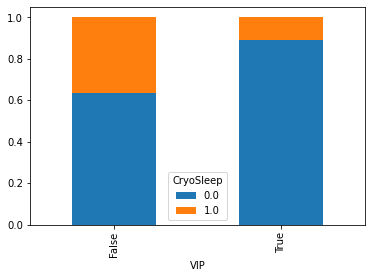

In [ ]:
temp = pd.crosstab(train['VIP'], train['CryoSleep'], normalize='index')
temp.plot.bar(stacked=True)

- Cryo NaN처리를 drop해도 되지만 True가 앞도적으로 높기 때문에 True인 경우 0을 대입해도 무관할 듯 하다

In [30]:
# train['CryoSleep'].fillna()
train.loc[train['CryoSleep'].isna()].loc[train['VIP']==True] = 0
train.loc[train['CryoSleep'].isna()].loc[train['VIP']==False] = 1

C:\Users\User\AppData\Local\Temp\ipykernel_20792\2801259436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train['CryoSleep'].isna()].loc[train['VIP']==True] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_20792\2801259436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train['CryoSleep'].isna()].loc[train['VIP']==False] = 1


- mode()로 높은거로 설정하자 ...

In [31]:
train['CryoSleep'].fillna(0, inplace=True)

In [32]:
train.isna().sum()

HomePlanet     201
CryoSleep        0
Destination    182
Age            179
VIP            203
Transported      0
dtype: int64

In [33]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [34]:
train['HomePlanet'].fillna('Earth', inplace=True)

In [35]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [36]:
train['Destination'].fillna('TRAPPIST-1e', inplace=True)
train['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [37]:
train.isna().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age            179
VIP            203
Transported      0
dtype: int64

In [38]:
train['VIP'].mode()

0    False
Name: VIP, dtype: object

In [39]:
train['VIP'].fillna(False, inplace=True)

- 머신러닝을 이용하여 'Age'를 구해보자

In [41]:
train.isna().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age            179
VIP              0
Transported      0
dtype: int64

In [46]:
train.dtypes

HomePlanet      object
CryoSleep      float64
Destination     object
Age            float64
VIP               bool
Transported       bool
dtype: object

#### trans dump

In [47]:
train['VIP'] = train['VIP'].replace({False:0, True:1})
train['Transported'] = train['Transported'].replace({False:0, True:1})

In [48]:
dummy_columns = ['HomePlanet', 'Destination']
train = pd.get_dummies(data=train, columns=dummy_columns, drop_first=True)
train.dtypes

CryoSleep                    float64
Age                          float64
VIP                            int64
Transported                    int64
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
dtype: object

In [49]:
target = 'Age'

temp_data = train.loc[train['Age'].notnull()]
temp_data.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
Transported                  0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [51]:
age_x = temp_data.drop(labels=target, axis=1)
age_y = temp_data[target]
train_age_x, val_age_x, train_age_y, val_age_y = train_test_split(age_x, age_y, test_size=.2, shuffle=True)

In [54]:
train_age_x.shape

(6811, 7)

In [53]:
val_age_x.shape

(1703, 7)

In [55]:
model_linear = LinearRegression()
model_linear.fit(train_age_x, train_age_y)
pred_linear = model_linear.predict(val_age_x)

In [56]:
print(r2_score(val_age_y, pred_linear))

0.07746806502990566


- 최악이네...? 그냥 drop시키자...

In [57]:
train.drop(labels='Age', axis=1, inplace=True)
train.shape

(8693, 7)

In [58]:
train.head()

,CryoSleep,VIP,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,0,0,1,0,0,1
1,0.0,0,1,0,0,0,1
2,0.0,1,0,1,0,0,1
3,0.0,0,0,1,0,0,1
4,0.0,0,1,0,0,0,1


## Modeling

In [59]:
target = 'Transported'

x = train.drop(labels=target, axis=1)
y = train[target]

train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=.25, shuffle=True)
train_x.shape, val_x.shape

((6519, 6), (2174, 6))

In [62]:
model_rf = RandomForestClassifier()
model_rf.fit(train_x, train_y)
pred_rf = model_rf.predict(val_x)

In [63]:
print(classification_report(val_y, pred_rf))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74      1055
           1       0.81      0.56      0.66      1119

    accuracy                           0.71      2174
   macro avg       0.73      0.71      0.70      2174
weighted avg       0.73      0.71      0.70      2174

